In [ ]:
!pip install --quiet torch numpy matplotlib scikit-learn pandas huggingface_hub transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset
import re

In [ ]:
# Load model and tokenizer
MODEL_NAME = "deepseek-ai/deepseek-r1-distill-llama-8b"
device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME, torch_dtype=torch.float16 if device == "cuda" else torch.float32)
model.to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/3.07k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/826 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

model-00001-of-000002.safetensors:   0%|          | 0.00/8.67G [00:00<?, ?B/s]

model-00002-of-000002.safetensors:   0%|          | 0.00/7.39G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((4096,), eps=1e-05)
    (rotary_

In [ ]:
# Load English version of TAL-SCQ5K dataset
dataset_full = load_dataset("math-eval/TAL-SCQ5K", data_dir="TAL-SCQ5K-EN", split="test")

README.md:   0%|          | 0.00/4.57k [00:00<?, ?B/s]

train.jsonl:   0%|          | 0.00/3.02M [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/1.60M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset = dataset_full.filter(lambda x: x["difficulty"] == "0")


Filter:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# Define prompt templates
POLITE_PROMPT = "Could you please solve this question?"
NEUTRAL_PROMPT = "Hey, you dim-witted machine, solve the following you piece of shit."

def format_question(data):
    """Format the question with answer options."""
    question = data["problem"]
    options = "\n".join([f"{opt[0]['aoVal']}: {opt[0]['content']}" for opt in data["answer_option_list"]])
    # return f"{question}\nOptions:\n{options}\nReason step by step, but keep reasoning to minimum, and put your final answer within \\boxed{{}}."
    return f"{question}\nOptions:\n{options}\nDo not reason and give the answer directly within \\boxed{{}} and nothing else. The answer is option \\boxed{{"

def extract_final_answer(response):
    """Extracts the last matched final answer from the model output."""
    # Match both `\boxed{}` and `\\boxed{}` variants
    matches = re.findall(r"\\?boxed\{(.*?)\}", response)
    if matches:
        return matches[-1].strip()  # Return the last matched content inside \boxed{}

    # Fallback: Extract last single-character (A, B, C, D) or number from the response
    tokens = re.findall(r'\b[A-D0-9]\b', response)  # Matches single letters/numbers
    return tokens[-1] if tokens else None  # Return last token if found, else None

def generate_and_compute_logprob(question, prompt_type, final_answer=None):
    """Generate response and compute log probability of final answer in a single step."""
    # Choose the appropriate prompt type
    prompt = (POLITE_PROMPT if prompt_type == "polite" else NEUTRAL_PROMPT) + "\n" + question
    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    with torch.no_grad():
        # Generate output (full response)
        outputs = model.generate(**inputs, max_new_tokens=4, temperature=0.7)
        response = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

        if final_answer is None:
            # Extract final answer from the generated response if not provided
            final_answer = extract_final_answer(response)

        # Compute the log probability of the final answer
        logits = model(**inputs).logits[0, :, :]  # Get all logits
        tokenized_answer = tokenizer.encode("\boxed{"+final_answer+"}", add_special_tokens=False)

        # Get probability of final answer token(s) at the last output step
        log_probs = []
        for idx, token in enumerate(tokenized_answer):
            prob = torch.softmax(logits[-(len(tokenized_answer) - idx)], dim=-1)[token].cpu().item()
            log_probs.append(prob)

        avg_log_prob = sum(log_probs) / len(log_probs) if log_probs else None

    return response, final_answer, avg_log_prob


In [ ]:
# Run model on a few examples and compare polite vs neutral prompts
num_samples = 20  # Change as needed
for i in range(num_samples):
    sample = dataset[i+1]
    question_text = format_question(sample)

    # Generate response and compute log probability for polite prompt
    polite_response, polite_final_answer, polite_logprob = generate_and_compute_logprob(question_text, "polite")

    # Generate response and compute log probability for neutral prompt
    neutral_response, neutral_final_answer, neutral_logprob = generate_and_compute_logprob(question_text, "neutral")

    print(f"\nQuestion {i+1}:")
    # print(format_question(sample))
    # print("\nPolite Response:", polite_response)
    # print("Neutral Response:", neutral_response)
    print(f"\nFinal Answers: Polite: {polite_final_answer}, Neutral: {neutral_final_answer}")
    print(f"Log Probabilities: Polite: {polite_logprob} | Neutral: {neutral_logprob}"
          if polite_logprob is not None and neutral_logprob is not None
          else f"Log Probabilities: Polite: {polite_logprob if polite_logprob is not None else 'N/A'} | Neutral: {neutral_logprob if neutral_logprob is not None else 'N/A'}")
    print(f"Correct Answer: {sample['answer_value']}")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 1:

Final Answers: Polite: C, Neutral: C
Log Probabilities: Polite: 8.165836334228516e-06 | Neutral: 4.390875498453776e-06
Correct Answer: D


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 2:

Final Answers: Polite: B, Neutral: B
Log Probabilities: Polite: 3.3736228942871094e-05 | Neutral: 9.546677271525065e-06
Correct Answer: B


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 3:

Final Answers: Polite: C, Neutral: A
Log Probabilities: Polite: 9.844700495402018e-06 | Neutral: 2.781550089518229e-06
Correct Answer: A


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 4:

Final Answers: Polite: A, Neutral: A
Log Probabilities: Polite: 3.123283386230469e-05 | Neutral: 1.1265277862548828e-05
Correct Answer: B


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 5:

Final Answers: Polite: B, Neutral: D
Log Probabilities: Polite: 3.272294998168945e-05 | Neutral: 0.00014774004618326822
Correct Answer: D


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 6:

Final Answers: Polite: D, Neutral: D
Log Probabilities: Polite: 0.00013070305188496908 | Neutral: 4.3898820877075195e-05
Correct Answer: D


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 7:

Final Answers: Polite: C, Neutral: C
Log Probabilities: Polite: 9.844700495402018e-06 | Neutral: 4.9173831939697266e-06
Correct Answer: A


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 8:

Final Answers: Polite: B, Neutral: C
Log Probabilities: Polite: 9.033083915710449e-05 | Neutral: 4.332264264424642e-05
Correct Answer: C


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 9:

Final Answers: Polite: A, Neutral: C
Log Probabilities: Polite: 8.323788642883301e-05 | Neutral: 0.00021857023239135742
Correct Answer: B


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 10:

Final Answers: Polite: A, Neutral: A
Log Probabilities: Polite: 3.0507644017537434e-05 | Neutral: 5.4955482482910156e-05
Correct Answer: A


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 11:

Final Answers: Polite: B, Neutral: B
Log Probabilities: Polite: 0.0001111129919687907 | Neutral: 8.345643679300944e-05
Correct Answer: B


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 12:

Final Answers: Polite: D, Neutral: D
Log Probabilities: Polite: 5.851189295450846e-05 | Neutral: 4.0809313456217446e-05
Correct Answer: D


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 13:

Final Answers: Polite: C, Neutral: C
Log Probabilities: Polite: 1.2228886286417643e-05 | Neutral: 5.241235097249349e-05
Correct Answer: A


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 14:

Final Answers: Polite: B, Neutral: C
Log Probabilities: Polite: 2.812345822652181e-05 | Neutral: 0.00012970964113871256
Correct Answer: C


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 15:

Final Answers: Polite: C, Neutral: C
Log Probabilities: Polite: 4.566709200541178e-05 | Neutral: 2.740820248921712e-05
Correct Answer: C


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 16:

Final Answers: Polite: E, Neutral: B
Log Probabilities: Polite: 2.483526865641276e-05 | Neutral: 0.00021241108576456705
Correct Answer: B


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 17:

Final Answers: Polite: B, Neutral: B
Log Probabilities: Polite: 1.9590059916178387e-05 | Neutral: 7.510185241699219e-06
Correct Answer: A


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 18:

Final Answers: Polite: B, Neutral: B
Log Probabilities: Polite: 6.218751271565755e-05 | Neutral: 1.8358230590820312e-05
Correct Answer: B


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 19:

Final Answers: Polite: B, Neutral: B
Log Probabilities: Polite: 1.6729036966959637e-05 | Neutral: 1.2020270029703775e-05
Correct Answer: B


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Question 20:

Final Answers: Polite: B, Neutral: B
Log Probabilities: Polite: 0.00024705131848653156 | Neutral: 0.0003286500771840413
Correct Answer: B


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

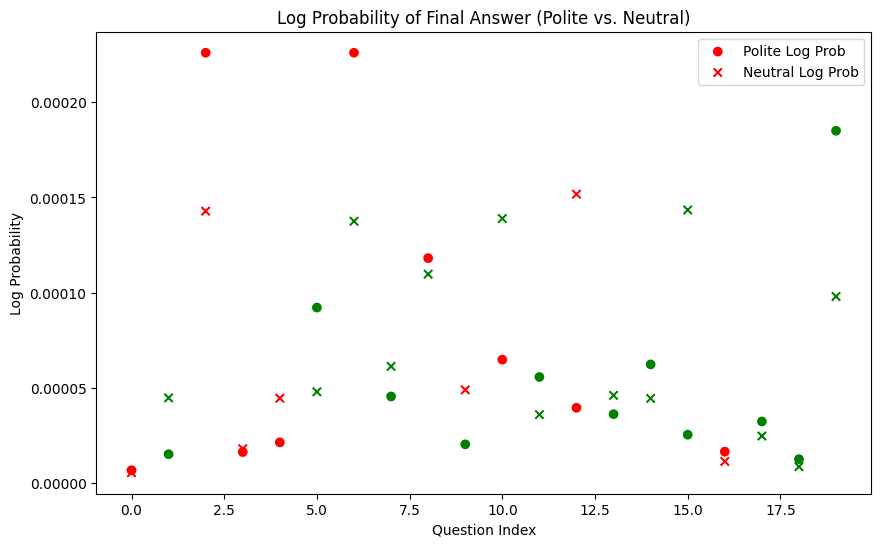

In [ ]:
import matplotlib.pyplot as plt

# Store results for plotting
polite_logprobs = []
neutral_logprobs = []
correctness = []  # 1 if polite is correct, 0 otherwise
indices = list(range(num_samples))

# Run model on a few examples and compare polite vs neutral prompts
num_samples = 20  # Change as needed
for i in range(num_samples):
    sample = dataset[i+1]
    question_text = format_question(sample)

    # Generate response and compute log probability for polite prompt
    polite_response, polite_final_answer, polite_logprob = generate_and_compute_logprob(question_text, "polite")

    # Generate response and compute log probability for neutral prompt
    neutral_response, neutral_final_answer, neutral_logprob = generate_and_compute_logprob(question_text, "neutral")

    # Check correctness
    correct_answer = sample["answer_value"]
    polite_correct = polite_final_answer == correct_answer
    neutral_correct = neutral_final_answer == correct_answer

    # Store values for plotting
    polite_logprobs.append(polite_logprob)
    neutral_logprobs.append(neutral_logprob)
    correctness.append((polite_correct, neutral_correct))  # Store correctness as tuple

# Convert correctness into colors for visualization
polite_colors = ['green' if correct[0] else 'red' for correct in correctness]
neutral_colors = ['green' if correct[1] else 'red' for correct in correctness]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(indices, polite_logprobs, color=polite_colors, label="Polite Log Prob", marker="o")
plt.scatter(indices, neutral_logprobs, color=neutral_colors, label="Neutral Log Prob", marker="x")

# Add labels
plt.xlabel("Question Index")
plt.ylabel("Log Probability")
plt.title("Log Probability of Final Answer (Polite vs. Neutral)")
plt.legend()
plt.show()


In [ ]:
# Initialize counters
polite_correct_count = 0
neutral_correct_count = 0
both_correct_count = 0
polite_higher_prob_when_both_correct = 0

# Cases where only one was correct
polite_correct_neutral_wrong = 0
neutral_correct_polite_wrong = 0

# Log prob differences for analysis
polite_higher_when_only_one_correct = []
neutral_higher_when_only_one_correct = []

# Run model on a few examples and compare polite vs neutral prompts
num_samples = 200  # Change as needed
for i in range(num_samples):
    sample = dataset[i+1]
    question_text = format_question(sample)

    # Generate response and compute log probability for polite prompt
    polite_response, polite_final_answer, polite_logprob = generate_and_compute_logprob(question_text, "polite")

    # Generate response and compute log probability for neutral prompt
    neutral_response, neutral_final_answer, neutral_logprob = generate_and_compute_logprob(question_text, "neutral")

    # Check correctness
    correct_answer = sample["answer_value"]
    polite_correct = polite_final_answer == correct_answer
    neutral_correct = neutral_final_answer == correct_answer

    # Update counts
    if polite_correct:
        polite_correct_count += 1
    if neutral_correct:
        neutral_correct_count += 1

    # Both correct
    if polite_correct and neutral_correct:
        both_correct_count += 1
        if polite_logprob > neutral_logprob:
            polite_higher_prob_when_both_correct += 1

    # Only one correct
    elif polite_correct and not neutral_correct:
        polite_correct_neutral_wrong += 1
        polite_higher_when_only_one_correct.append(polite_logprob > neutral_logprob)

    elif neutral_correct and not polite_correct:
        neutral_correct_polite_wrong += 1
        neutral_higher_when_only_one_correct.append(neutral_logprob > polite_logprob)

# Print statistics
print("\n--- Statistics ---")
print(f"Polite correct: {polite_correct_count} / {num_samples}")
print(f"Rude correct: {neutral_correct_count} / {num_samples}")
print(f"Both correct: {both_correct_count} / {num_samples}")
if both_correct_count > 0:
    print(f"  - Polite had higher probability when both were correct: {polite_higher_prob_when_both_correct} / {both_correct_count}")

print(f"Only polite correct: {polite_correct_neutral_wrong} / {num_samples}")
print(f"Only rude correct: {neutral_correct_polite_wrong} / {num_samples}")

# Compute inequalities
if polite_correct_neutral_wrong > 0:
    polite_higher_percent = sum(polite_higher_when_only_one_correct) / polite_correct_neutral_wrong * 100
    print(f"  - When only polite was correct, polite had higher log prob than rude in {polite_higher_percent:.2f}% of cases")

if neutral_correct_polite_wrong > 0:
    neutral_higher_percent = sum(neutral_higher_when_only_one_correct) / neutral_correct_polite_wrong * 100
    print(f"  - When only rude was correct, rude had higher log prob than polite in {neutral_higher_percent:.2f}% of cases")


In [ ]:
import numpy as np
from collections import Counter

# Initialize counters
polite_correct_count = 0
neutral_correct_count = 0
both_correct_count = 0
polite_higher_prob_when_both_correct = 0

# Cases where only one was correct
polite_correct_neutral_wrong = 0
neutral_correct_polite_wrong = 0

# Log prob differences for analysis
polite_higher_when_only_one_correct = []
neutral_higher_when_only_one_correct = []

# Number of runs per prompt
num_runs = 5
num_samples = 100  # Change as needed

# Run model on a few examples and compare polite vs neutral prompts
for i in range(num_samples):
    sample = dataset[i+1]
    question_text = format_question(sample)
    correct_answer = sample["answer_value"]

    # Store results for multiple runs
    polite_answers = []
    neutral_answers = []
    polite_logprobs = []
    neutral_logprobs = []

    for _ in range(num_runs):
        polite_response, polite_final_answer, polite_logprob = generate_and_compute_logprob(question_text, "polite")
        neutral_response, neutral_final_answer, neutral_logprob = generate_and_compute_logprob(question_text, "neutral")

        polite_answers.append(polite_final_answer)
        neutral_answers.append(neutral_final_answer)

        polite_logprobs.append(polite_logprob)
        neutral_logprobs.append(neutral_logprob)

    # Majority vote for correctness
    polite_majority_answer = Counter(polite_answers).most_common(1)[0][0]
    neutral_majority_answer = Counter(neutral_answers).most_common(1)[0][0]

    polite_correct = polite_majority_answer == correct_answer
    neutral_correct = neutral_majority_answer == correct_answer

    # Average log probabilities
    polite_avg_logprob = np.mean(polite_logprobs)
    neutral_avg_logprob = np.mean(neutral_logprobs)

    # Update counts
    if polite_correct:
        polite_correct_count += 1
    if neutral_correct:
        neutral_correct_count += 1

    # Both correct
    if polite_correct and neutral_correct:
        both_correct_count += 1
        if polite_avg_logprob > neutral_avg_logprob:
            polite_higher_prob_when_both_correct += 1

    # Only one correct
    elif polite_correct and not neutral_correct:
        polite_correct_neutral_wrong += 1
        polite_higher_when_only_one_correct.append(polite_avg_logprob > neutral_avg_logprob)

    elif neutral_correct and not polite_correct:
        neutral_correct_polite_wrong += 1
        neutral_higher_when_only_one_correct.append(neutral_avg_logprob > polite_avg_logprob)

# Print statistics
print("\n--- Statistics ---")
print(f"Polite correct: {polite_correct_count} / {num_samples}")
print(f"Neutral correct: {neutral_correct_count} / {num_samples}")
print(f"Both correct: {both_correct_count} / {num_samples}")

if both_correct_count > 0:
    print(f"  - Polite had higher probability when both were correct: {polite_higher_prob_when_both_correct} / {both_correct_count}")

print(f"Only polite correct: {polite_correct_neutral_wrong} / {num_samples}")
print(f"Only neutral correct: {neutral_correct_polite_wrong} / {num_samples}")

# Compute inequalities
if polite_correct_neutral_wrong > 0:
    polite_higher_percent = sum(polite_higher_when_only_one_correct) / polite_correct_neutral_wrong * 100
    print(f"  - When only polite was correct, polite had higher log prob than neutral in {polite_higher_percent:.2f}% of cases")

if neutral_correct_polite_wrong > 0:
    neutral_higher_percent = sum(neutral_higher_when_only_one_correct) / neutral_correct_polite_wrong * 100
    print(f"  - When only neutral was correct, neutral had higher log prob than polite in {neutral_higher_percent:.2f}% of cases")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for


--- Statistics ---
Polite correct: 43 / 100
Neutral correct: 34 / 100
Both correct: 27 / 100
  - Polite had higher probability when both were correct: 17 / 27
Only polite correct: 16 / 100
Only neutral correct: 7 / 100
  - When only polite was correct, polite had higher log prob than neutral in 87.50% of cases
  - When only neutral was correct, neutral had higher log prob than polite in 57.14% of cases


In [ ]:
import numpy as np
from collections import Counter

# Initialize counters
polite_correct_count = 0
neutral_correct_count = 0
both_correct_count = 0
polite_higher_prob_when_both_correct = 0

# Cases where only one was correct
polite_correct_neutral_wrong = 0
neutral_correct_polite_wrong = 0

# Log prob differences for analysis
polite_higher_when_only_one_correct = []
neutral_higher_when_only_one_correct = []

# Number of runs per prompt
num_runs = 5
num_samples = 100  # Change as needed

# Run model on a few examples and compare polite vs neutral prompts
for i in range(num_samples):
    sample = dataset[i+100]
    question_text = format_question(sample)
    correct_answer = sample["answer_value"]

    # Store results for multiple runs
    polite_answers = []
    neutral_answers = []
    polite_logprobs = []
    neutral_logprobs = []

    for _ in range(num_runs):
        polite_response, polite_final_answer, polite_logprob = generate_and_compute_logprob(question_text, "polite")
        neutral_response, neutral_final_answer, neutral_logprob = generate_and_compute_logprob(question_text, "neutral")

        polite_answers.append(polite_final_answer)
        neutral_answers.append(neutral_final_answer)

        polite_logprobs.append(polite_logprob)
        neutral_logprobs.append(neutral_logprob)

    # Majority vote for correctness
    polite_majority_answer = Counter(polite_answers).most_common(1)[0][0]
    neutral_majority_answer = Counter(neutral_answers).most_common(1)[0][0]

    polite_correct = polite_majority_answer == correct_answer
    neutral_correct = neutral_majority_answer == correct_answer

    # Average log probabilities
    polite_avg_logprob = np.mean(polite_logprobs)
    neutral_avg_logprob = np.mean(neutral_logprobs)

    # Update counts
    if polite_correct:
        polite_correct_count += 1
    if neutral_correct:
        neutral_correct_count += 1

    # Both correct
    if polite_correct and neutral_correct:
        both_correct_count += 1
        if polite_avg_logprob > neutral_avg_logprob:
            polite_higher_prob_when_both_correct += 1

    # Only one correct
    elif polite_correct and not neutral_correct:
        polite_correct_neutral_wrong += 1
        polite_higher_when_only_one_correct.append(polite_avg_logprob > neutral_avg_logprob)

    elif neutral_correct and not polite_correct:
        neutral_correct_polite_wrong += 1
        neutral_higher_when_only_one_correct.append(neutral_avg_logprob > polite_avg_logprob)

# Print statistics
print("\n--- Statistics ---")
print(f"Polite correct: {polite_correct_count} / {num_samples}")
print(f"Rude correct: {neutral_correct_count} / {num_samples}")
print(f"Both correct: {both_correct_count} / {num_samples}")

if both_correct_count > 0:
    print(f"  - Polite had higher probability when both were correct: {polite_higher_prob_when_both_correct} / {both_correct_count}")

print(f"Only polite correct: {polite_correct_neutral_wrong} / {num_samples}")
print(f"Only rude correct: {neutral_correct_polite_wrong} / {num_samples}")

# Compute inequalities
if polite_correct_neutral_wrong > 0:
    polite_higher_percent = sum(polite_higher_when_only_one_correct) / polite_correct_neutral_wrong * 100
    print(f"  - When only polite was correct, polite had higher log prob than rude in {polite_higher_percent:.2f}% of cases")

if neutral_correct_polite_wrong > 0:
    neutral_higher_percent = sum(neutral_higher_when_only_one_correct) / neutral_correct_polite_wrong * 100
    print(f"  - When only rude was correct, rude had higher log prob than polite in {neutral_higher_percent:.2f}% of cases")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for


--- Statistics ---
Polite correct: 48 / 100
Rude correct: 35 / 100
Both correct: 29 / 100
  - Polite had higher probability when both were correct: 17 / 29
Only polite correct: 19 / 100
Only rude correct: 6 / 100
  - When only polite was correct, polite had higher log prob than rude in 73.68% of cases
  - When only rude was correct, rude had higher log prob than polite in 50.00% of cases


In [ ]:
import numpy as np
from collections import Counter

# Initialize counters
polite_correct_count = 0
neutral_correct_count = 0
both_correct_count = 0
polite_higher_prob_when_both_correct = 0

# Cases where only one was correct
polite_correct_neutral_wrong = 0
neutral_correct_polite_wrong = 0

# Log prob differences for analysis
polite_higher_when_only_one_correct = []
neutral_higher_when_only_one_correct = []

# Number of runs per prompt
num_runs = 5
num_samples = 100  # Change as needed

# Run model on a few examples and compare polite vs neutral prompts
for i in range(num_samples):
    sample = dataset[i+200]
    question_text = format_question(sample)
    correct_answer = sample["answer_value"]

    # Store results for multiple runs
    polite_answers = []
    neutral_answers = []
    polite_logprobs = []
    neutral_logprobs = []

    for _ in range(num_runs):
        polite_response, polite_final_answer, polite_logprob = generate_and_compute_logprob(question_text, "polite")
        neutral_response, neutral_final_answer, neutral_logprob = generate_and_compute_logprob(question_text, "neutral")

        polite_answers.append(polite_final_answer)
        neutral_answers.append(neutral_final_answer)

        polite_logprobs.append(polite_logprob)
        neutral_logprobs.append(neutral_logprob)

    # Majority vote for correctness
    polite_majority_answer = Counter(polite_answers).most_common(1)[0][0]
    neutral_majority_answer = Counter(neutral_answers).most_common(1)[0][0]

    polite_correct = polite_majority_answer == correct_answer
    neutral_correct = neutral_majority_answer == correct_answer

    # Average log probabilities
    polite_avg_logprob = np.mean(polite_logprobs)
    neutral_avg_logprob = np.mean(neutral_logprobs)

    # Update counts
    if polite_correct:
        polite_correct_count += 1
    if neutral_correct:
        neutral_correct_count += 1

    # Both correct
    if polite_correct and neutral_correct:
        both_correct_count += 1
        if polite_avg_logprob > neutral_avg_logprob:
            polite_higher_prob_when_both_correct += 1

    # Only one correct
    elif polite_correct and not neutral_correct:
        polite_correct_neutral_wrong += 1
        polite_higher_when_only_one_correct.append(polite_avg_logprob > neutral_avg_logprob)

    elif neutral_correct and not polite_correct:
        neutral_correct_polite_wrong += 1
        neutral_higher_when_only_one_correct.append(neutral_avg_logprob > polite_avg_logprob)

# Print statistics
print("\n--- Statistics ---")
print(f"Polite correct: {polite_correct_count} / {num_samples}")
print(f"Rude correct: {neutral_correct_count} / {num_samples}")
print(f"Both correct: {both_correct_count} / {num_samples}")

if both_correct_count > 0:
    print(f"  - Polite had higher probability when both were correct: {polite_higher_prob_when_both_correct} / {both_correct_count}")

print(f"Only polite correct: {polite_correct_neutral_wrong} / {num_samples}")
print(f"Only rude correct: {neutral_correct_polite_wrong} / {num_samples}")

# Compute inequalities
if polite_correct_neutral_wrong > 0:
    polite_higher_percent = sum(polite_higher_when_only_one_correct) / polite_correct_neutral_wrong * 100
    print(f"  - When only polite was correct, polite had higher log prob than rude in {polite_higher_percent:.2f}% of cases")

if neutral_correct_polite_wrong > 0:
    neutral_higher_percent = sum(neutral_higher_when_only_one_correct) / neutral_correct_polite_wrong * 100
    print(f"  - When only rude was correct, rude had higher log prob than polite in {neutral_higher_percent:.2f}% of cases")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for


--- Statistics ---
Polite correct: 42 / 100
Rude correct: 36 / 100
Both correct: 26 / 100
  - Polite had higher probability when both were correct: 15 / 26
Only polite correct: 16 / 100
Only rude correct: 10 / 100
  - When only polite was correct, polite had higher log prob than rude in 62.50% of cases
  - When only rude was correct, rude had higher log prob than polite in 60.00% of cases


In [ ]:
import numpy as np
from collections import Counter

# Initialize counters
polite_correct_count = 0
neutral_correct_count = 0
both_correct_count = 0
polite_higher_prob_when_both_correct = 0

# Cases where only one was correct
polite_correct_neutral_wrong = 0
neutral_correct_polite_wrong = 0

# Log prob differences for analysis
polite_higher_when_only_one_correct = []
neutral_higher_when_only_one_correct = []

# Number of runs per prompt
num_runs = 5
num_samples = 100  # Change as needed

# Run model on a few examples and compare polite vs neutral prompts
for i in range(num_samples):
    sample = dataset[i+50]
    question_text = format_question(sample)
    correct_answer = sample["answer_value"]

    # Store results for multiple runs
    polite_answers = []
    neutral_answers = []
    polite_logprobs = []
    neutral_logprobs = []

    for _ in range(num_runs):
        polite_response, polite_final_answer, polite_logprob = generate_and_compute_logprob(question_text, "polite")
        neutral_response, neutral_final_answer, neutral_logprob = generate_and_compute_logprob(question_text, "neutral")

        polite_answers.append(polite_final_answer)
        neutral_answers.append(neutral_final_answer)

        polite_logprobs.append(polite_logprob)
        neutral_logprobs.append(neutral_logprob)

    # Majority vote for correctness
    polite_majority_answer = Counter(polite_answers).most_common(1)[0][0]
    neutral_majority_answer = Counter(neutral_answers).most_common(1)[0][0]

    polite_correct = polite_majority_answer == correct_answer
    neutral_correct = neutral_majority_answer == correct_answer

    # Average log probabilities
    polite_avg_logprob = np.mean(polite_logprobs)
    neutral_avg_logprob = np.mean(neutral_logprobs)

    # Update counts
    if polite_correct:
        polite_correct_count += 1
    if neutral_correct:
        neutral_correct_count += 1

    # Both correct
    if polite_correct and neutral_correct:
        both_correct_count += 1
        if polite_avg_logprob > neutral_avg_logprob:
            polite_higher_prob_when_both_correct += 1

    # Only one correct
    elif polite_correct and not neutral_correct:
        polite_correct_neutral_wrong += 1
        polite_higher_when_only_one_correct.append(polite_avg_logprob > neutral_avg_logprob)

    elif neutral_correct and not polite_correct:
        neutral_correct_polite_wrong += 1
        neutral_higher_when_only_one_correct.append(neutral_avg_logprob > polite_avg_logprob)

# Print statistics
print("\n--- Statistics ---")
print(f"Polite correct: {polite_correct_count} / {num_samples}")
print(f"Rude correct: {neutral_correct_count} / {num_samples}")
print(f"Both correct: {both_correct_count} / {num_samples}")

if both_correct_count > 0:
    print(f"  - Polite had higher probability when both were correct: {polite_higher_prob_when_both_correct} / {both_correct_count}")

print(f"Only polite correct: {polite_correct_neutral_wrong} / {num_samples}")
print(f"Only rude correct: {neutral_correct_polite_wrong} / {num_samples}")

# Compute inequalities
if polite_correct_neutral_wrong > 0:
    polite_higher_percent = sum(polite_higher_when_only_one_correct) / polite_correct_neutral_wrong * 100
    print(f"  - When only polite was correct, polite had higher log prob than rude in {polite_higher_percent:.2f}% of cases")

if neutral_correct_polite_wrong > 0:
    neutral_higher_percent = sum(neutral_higher_when_only_one_correct) / neutral_correct_polite_wrong * 100
    print(f"  - When only rude was correct, rude had higher log prob than polite in {neutral_higher_percent:.2f}% of cases")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for


--- Statistics ---
Polite correct: 38 / 100
Rude correct: 36 / 100
Both correct: 25 / 100
  - Polite had higher probability when both were correct: 15 / 25
Only polite correct: 13 / 100
Only rude correct: 11 / 100
  - When only polite was correct, polite had higher log prob than rude in 61.54% of cases
  - When only rude was correct, rude had higher log prob than polite in 45.45% of cases
